In [108]:
#Source: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb
#https://www.tensorflow.org/tutorials/images/classification?hl=en
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd


import sys
from PIL import Image
sys.modules['Image'] = Image 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

import pathlib


In [109]:
tf.__version__

'2.3.1'

In [110]:
# Get current path
ROOT_PATH = os.path.abspath('')

In [111]:
train_dir = pathlib.Path(ROOT_PATH).joinpath("train/")
train_dir

WindowsPath('C:/keras/train')

In [112]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

208


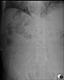

In [113]:
healthy = list(train_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

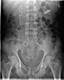

In [114]:
patients = list(train_dir.glob('patient/*'))
PIL.Image.open(str(patients[1]))

In [115]:
test_dir = pathlib.Path(ROOT_PATH).joinpath("test/")
test_dir

WindowsPath('C:/keras/test')

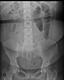

In [116]:
test_healthy=list(test_dir.glob('healthy/*'))
PIL.Image.open(str(test_healthy[0]))

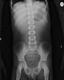

In [117]:
test_patients = list(test_dir.glob('patient/*'))
PIL.Image.open(str(test_patients[1]))

In [118]:
batch_size = 32
img_height = 80
img_width = 64

In [119]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='binary',
    shuffle=False) # set as test data



Found 167 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [120]:
# TEST DIR'DA healthy ve patient diye ayrılmalı

In [121]:
#train a model
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [122]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [143]:
epochs=150
history=model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/150
5/5 [==============================] - 1s 138ms/step - loss: 1.6371e-04 - accuracy: 1.0000 - val_loss: 1.8672 - val_accuracy: 0.8438
Epoch 2/150
5/5 [==============================] - 1s 123ms/step - loss: 1.7778e-04 - accuracy: 1.0000 - val_loss: 2.6906 - val_accuracy: 0.6875
Epoch 3/150
5/5 [==============================] - 1s 126ms/step - loss: 2.7218e-04 - accuracy: 1.0000 - val_loss: 2.6607 - val_accuracy: 0.7500
Epoch 4/150
5/5 [==============================] - 1s 109ms/step - loss: 2.8906e-04 - accuracy: 1.0000 - val_loss: 2.3147 - val_accuracy: 0.7812
Epoch 5/150
5/5 [==============================] - 1s 113ms/step - loss: 5.1707e-04 - accuracy: 1.0000 - val_loss: 2.4295 - val_accuracy: 0.7188
Epoch 6/150
5/5 [==============================] - 1s 119ms/step - loss: 3.2519e-04 - accuracy: 1.0000 - val_loss: 3.6777 - val_accuracy: 0.6875
Epoch 7/150
5/5 [==============================] - 1s 106ms/step - loss: 4.2394e-04 - accuracy: 1.0000 - val_loss: 2.5024 - val_ac

5/5 [==============================] - 1s 109ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.5363 - val_accuracy: 0.8125
Epoch 58/150
5/5 [==============================] - 1s 120ms/step - loss: 8.0910e-04 - accuracy: 1.0000 - val_loss: 1.8188 - val_accuracy: 0.7500
Epoch 59/150
5/5 [==============================] - 1s 119ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.8111 - val_accuracy: 0.7500
Epoch 60/150
5/5 [==============================] - 1s 121ms/step - loss: 4.3727e-04 - accuracy: 1.0000 - val_loss: 2.1991 - val_accuracy: 0.7812
Epoch 61/150
5/5 [==============================] - 1s 110ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.1877 - val_accuracy: 0.7812
Epoch 62/150
5/5 [==============================] - 1s 133ms/step - loss: 0.0098 - accuracy: 0.9926 - val_loss: 1.8700 - val_accuracy: 0.8125
Epoch 63/150
5/5 [==============================] - 1s 113ms/step - loss: 0.0845 - accuracy: 0.9778 - val_loss: 3.0579 - val_accuracy: 0.7188
Epoch 64/15

5/5 [==============================] - 1s 106ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 3.1930 - val_accuracy: 0.7500
Epoch 115/150
5/5 [==============================] - 1s 106ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.3312 - val_accuracy: 0.7500
Epoch 116/150
5/5 [==============================] - 1s 120ms/step - loss: 0.0126 - accuracy: 0.9937 - val_loss: 1.4921 - val_accuracy: 0.7188
Epoch 117/150
5/5 [==============================] - 1s 124ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.1518 - val_accuracy: 0.6562
Epoch 118/150
5/5 [==============================] - 1s 105ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.3278 - val_accuracy: 0.7812
Epoch 119/150
5/5 [==============================] - 1s 120ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.6893 - val_accuracy: 0.7812
Epoch 120/150
5/5 [==============================] - 1s 114ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.2799 - val_accuracy: 0.7812
Epoch 121/150

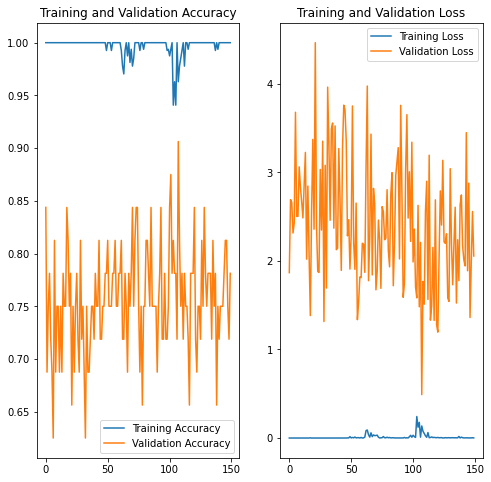

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [145]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=len(test_generator))
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


top=0.0
ort=0.0
for i in range(len(pred)):
    score = tf.nn.softmax(pred[i])
    max=100 * np.max(score)
    print("The image {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(i,predictions[np.argmax(score)],max )
    )
    top=top+max
ort=top/(len(pred))
print("Average confidence:",ort)


15/15 [==============================] - 0s 3ms/step
The image 0 most likely belongs to patient with a 99.96 percent confidence.
The image 1 most likely belongs to patient with a 100.00 percent confidence.
The image 2 most likely belongs to patient with a 100.00 percent confidence.
The image 3 most likely belongs to patient with a 100.00 percent confidence.
The image 4 most likely belongs to patient with a 99.99 percent confidence.
The image 5 most likely belongs to patient with a 100.00 percent confidence.
The image 6 most likely belongs to patient with a 100.00 percent confidence.
The image 7 most likely belongs to patient with a 100.00 percent confidence.
The image 8 most likely belongs to patient with a 100.00 percent confidence.
The image 9 most likely belongs to patient with a 99.96 percent confidence.
The image 10 most likely belongs to patient with a 100.00 percent confidence.
The image 11 most likely belongs to patient with a 87.60 percent confidence.
The image 12 most likely 

In [146]:
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames
# Data frame
results=pd.DataFrame({"file":filenames,"pr":predictions[np.argmax(score)]})
print(results)

                                        file       pr
0   healthy\Saltmisdokuz_resized_resized.jpg  patient
1    healthy\Saltmisdort_resized_resized.jpg  patient
2      healthy\Selliyedi_resized_resized.jpg  patient
3        healthy\Skirkuc_resized_resized.jpg  patient
4     healthy\Sotuzsekiz_resized_resized.jpg  patient
5         healthy\Ssekiz_resized_resized.jpg  patient
6     patient\altmisalti_resized_resized.jpg  patient
7      patient\altmisbes_resized_resized.jpg  patient
8      patient\altmisbir_resized_resized.jpg  patient
9    patient\altmisdokuz_resized_resized.jpg  patient
10    patient\altmisdort_resized_resized.jpg  patient
11     patient\altmisiki_resized_resized.jpg  patient
12   patient\altmissekiz_resized_resized.jpg  patient
13      patient\altmisuc_resized_resized.jpg  patient
14    patient\altmisyedi_resized_resized.jpg  patient
